<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/BGMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs #임의의 데이터 생성 위함
from matplotlib import pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

<ipython-input-4-a98be14f7c7c>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


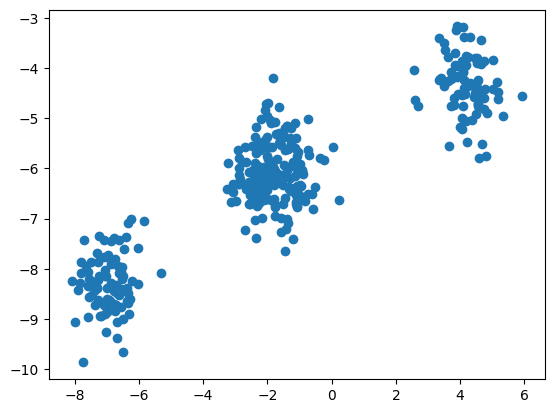

In [4]:
X, y = make_blobs(n_samples = 350, centers=4, cluster_std=0.60) #임의의 샘플 데이터 생성
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

In [8]:
#BGMM 모델 학습
bay_gmm = BayesianGaussianMixture(n_components=10, n_init=10)
bay_gmm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [10]:
bay_gmm_weights = bay_gmm.weights_#클러스터 별 가중치 계산 결과
np.round(bay_gmm_weights, 2)
"""
array([0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]) -> 클러스터 3개한테만 weight가 부여된걸 볼 수 있음 -> 4개를 지정해줬지만, 3개만 쓴다는 소리 나머지는 다 불필요해서 버림
"""

'\narray([0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]) -> 클러스터 3개한테만 weight가 부여된걸 볼 수 있음 -> 3개만 쓴다는 소리 나머지는 다 불필요해서 버림\n'

In [11]:
n_clusters_ = (np.round(bay_gmm_weights, 2) > 0).sum()
 #weight를 소숫점 이하 2자리로 반올림 하고 반올림 후 가중치가 0이 아닌 정규분포 수를 count함

print('Extimated number of clusters : ' + str(n_clusters_))

# Extimated number of clusters : 3

Text(0.5, 0, '피처 2')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


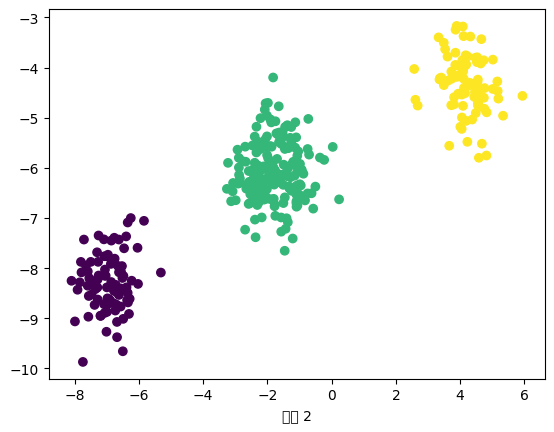

In [19]:
#X로 bgmm 모델을 훈련했다면, 이제 preidct(X) 를 사용하면 X의 각 관측치가 클러스터 중 하나에 할당된다.(labeling)
labels = bay_gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel("피처 1")
plt.xlabel("피처 2")

In [14]:
props = bay_gmm.predict_proba(X)
props = props.round(3)
props

array([[0.   , 0.001, 0.999, ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

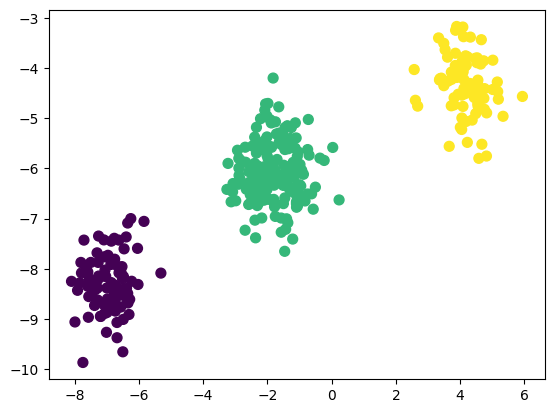

In [21]:
size = 50 * props.max(1) ** 2  # square emphasizes differences -> 신뢰도가 높을수록 점 크기가 커짐
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size) #